# Modulos

In [1]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Rutas y dataframes

In [2]:
R_Expedientes = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\SIE\Aseguramiento\Expedientes\Años\2025-12-03.txt"

In [3]:
df_expedientes = pd.read_csv(R_Expedientes, sep='|', encoding='ansi', dtype=str, header=0)
print(df_expedientes.columns)

Index(['Proceso', 'Tipo', 'Expediente', 'Tipo Documento',
       'Número Identificación', 'Nombre Afiliado', 'Fecha de Nacimiento',
       'Departamento', 'Municipio', 'Estado Expediente', 'Régimen Expediente',
       'Fecha Grabado', 'Usuario Grabado', 'Fecha Cierre', 'Usuario Cierre',
       'Carta Derechos', 'NS Automática', 'Tipo Ingreso', 'EPS Procedencia',
       'Causal Anulación', 'Motivo Anulación', 'Usuario Anula', 'Fecha Anula',
       'Unnamed: 23'],
      dtype='object')


In [4]:
print(df_expedientes['Usuario Cierre'].unique())

['luz.giraldo' 'darwin.tuay' 'luz.gaitan' nan 'lina.gutierrez'
 'idaly.rojas' 'yili.sanabria' 'anthony.caicedo' 'solen.heredia'
 'karen.melo' 'zoraida.rubio' 'ana.pastrana' 'florelba.ramirez'
 'Jhonatan.perez' 'nini.meneses' 'ana.martinez' 'sindy.heredia'
 'nelly.catolico' 'clara.rincon' 'paola.baron' 'paula.otalora'
 'leyditd.barbosa' 'angie.rodriguez' 'rosa.cruz' 'yuri.miranda'
 'angie.heredia' 'nancy.arismendy' 'osmar.rincon' 'faver.guerrero'
 'leidy.pedraza' 'cristian.romero' 'anyi.chacon' 'darling.mendoza'
 'yury.marta' 'maria.montoya' 'carlos.ramos' 'ruben.cardenas'
 'azury.duarte' 'flor.gutierrez' 'didier.bernal' 'sindy.garcia'
 'diana.borda' 'karem.higuera' 'ana.bayona' 'mei.ardila'
 'miguel.cristancho' 'root' 'camila.correa' 'jenny.ravelo' 'jose.piraban'
 'nayra.martinez' 'paula.rivera' 'jessica.vasquez']


In [5]:
# Lista de usuarios de Yopal
usuarios_yopal = ['luz.giraldo', 'darwin.tuay', 'lina.gutierrez', 'anthony.caicedo', 
                  'karen.melo', 'osmar.rincon', 'anyi.chacon', 'darling.mendoza', 
                  'ruben.cardenas', 'didier.bernal', 'sindy.garcia', 'diana.borda', 
                  'karem.higuera', 'mei.ardila', 'miguel.cristancho', 'camila.correa', 
                  'jenny.ravelo', 'paula.rivera', 'jessica.vasquez']

# Filtrar registros de Yopal
df_yopal = df_expedientes[df_expedientes['Usuario Cierre'].isin(usuarios_yopal)]

# Filtrar registros de Municipios (los que no están en la lista de Yopal)
df_municipios = df_expedientes[~df_expedientes['Usuario Cierre'].isin(usuarios_yopal)]

# Imprimir cantidades
print(f"Total df_expedientes: {len(df_expedientes)}")
print(f"Total df_yopal: {len(df_yopal)}")
print(f"Total df_municipios: {len(df_municipios)}")
print(f"\nVerificación: {len(df_yopal) + len(df_municipios)} = {len(df_expedientes)}")

Total df_expedientes: 95611
Total df_yopal: 32811
Total df_municipios: 62800

Verificación: 95611 = 95611


In [6]:
# Filtrar df_yopal eliminando registros donde 'Usuario Cierre' sea 'root', vacío o nulo
df_yopal = df_yopal[
    (df_yopal['Usuario Cierre'].notna()) &  # Eliminar valores nulos
    (df_yopal['Usuario Cierre'] != '') &     # Eliminar valores vacíos
    (df_yopal['Usuario Cierre'] != 'root')   # Eliminar valores 'root'
]

# Filtrar df_municipios eliminando registros donde 'Usuario Cierre' sea 'root', vacío o nulo
df_municipios = df_municipios[
    (df_municipios['Usuario Cierre'].notna()) &  # Eliminar valores nulos
    (df_municipios['Usuario Cierre'] != '') &     # Eliminar valores vacíos
    (df_municipios['Usuario Cierre'] != 'root')   # Eliminar valores 'root'
]

# Mostrar la cantidad de registros después de la limpieza
print(f"Total df_yopal después de limpieza: {len(df_yopal)}")
print(f"Total df_municipios después de limpieza: {len(df_municipios)}")

Total df_yopal después de limpieza: 32811
Total df_municipios después de limpieza: 60809


In [7]:
print(df_yopal['Departamento'].unique())
print(df_municipios['Departamento'].unique())

['Casanare' 'Antioquia' 'Meta' 'Boyaca' 'Quindio' 'Bogotá D.C.' 'Valle'
 'Norte Santander' 'Arauca' 'Cundinamarca' 'Magdalena' 'Santander' 'Cesar'
 'Caqueta' 'Bolivar' 'Atlantico' 'Vichada' 'Tolima' 'Guainia' 'Caldas'
 'Risaralda' nan 'Huila' 'Guaviare']
['Casanare' 'Norte Santander' 'Boyaca' 'Cundinamarca' 'Bogotá D.C.'
 'Antioquia' 'Meta' 'Valle' 'Cesar' 'Santander' 'Putumayo' 'Arauca'
 'Caqueta' 'Magdalena' 'Atlantico' 'Huila' 'Vichada' 'Tolima' 'Quindio'
 'Sucre' 'Risaralda']


In [8]:
# Mostrar cantidad de registros antes del filtro
print(f"Total df_municipios antes del filtro: {len(df_municipios)}")

# Filtrar df_municipios para que solo queden registros donde Departamento sea "Casanare"
df_municipios = df_municipios[df_municipios['Departamento'] == 'Casanare']

# Mostrar cantidad de registros después del filtro
print(f"Total df_municipios después del filtro: {len(df_municipios)}")

Total df_municipios antes del filtro: 60809
Total df_municipios después del filtro: 60464


In [9]:
# Mostrar cantidad de registros antes del filtro
print(f"Total df_yopal antes del filtro: {len(df_yopal)}")
print(f"Total df_municipios antes del filtro: {len(df_municipios)}")

# Filtrar df_yopal para que solo queden registros donde 'Causal Anulación' sea vacío, nulo o NaN
df_yopal = df_yopal[
    (df_yopal['Causal Anulación'].isna()) | 
    (df_yopal['Causal Anulación'] == '')
]

# Filtrar df_municipios para que solo queden registros donde 'Causal Anulación' sea vacío, nulo o NaN
df_municipios = df_municipios[
    (df_municipios['Causal Anulación'].isna()) | 
    (df_municipios['Causal Anulación'] == '')
]

# Mostrar cantidad de registros después del filtro
print(f"\nTotal df_yopal después del filtro: {len(df_yopal)}")
print(f"Total df_municipios después del filtro: {len(df_municipios)}")

Total df_yopal antes del filtro: 32811
Total df_municipios antes del filtro: 60464

Total df_yopal después del filtro: 32811
Total df_municipios después del filtro: 60462


In [10]:
# Convertir la columna 'Fecha Cierre' a formato datetime
df_yopal['Fecha Cierre'] = pd.to_datetime(df_yopal['Fecha Cierre'], format='%Y/%m/%d %H:%M', errors='coerce')
df_municipios['Fecha Cierre'] = pd.to_datetime(df_municipios['Fecha Cierre'], format='%Y/%m/%d %H:%M', errors='coerce')

# Verificar la conversión
print(f"Tipo de dato 'Fecha Cierre' en df_yopal: {df_yopal['Fecha Cierre'].dtype}")
print(f"Tipo de dato 'Fecha Cierre' en df_municipios: {df_municipios['Fecha Cierre'].dtype}")

Tipo de dato 'Fecha Cierre' en df_yopal: datetime64[ns]
Tipo de dato 'Fecha Cierre' en df_municipios: datetime64[ns]


In [11]:
# Mostrar cantidad de registros antes del filtro
print(f"Total df_municipios antes de procesar Yopal: {len(df_municipios)}")

# Separar registros de Yopal
df_yopal_municipio = df_municipios[df_municipios['Municipio'] == 'Yopal'].copy()
df_otros_municipios = df_municipios[df_municipios['Municipio'] != 'Yopal'].copy()

print(f"Registros de Yopal a distribuir: {len(df_yopal_municipio)}")
print(f"Registros de otros municipios: {len(df_otros_municipios)}")

# Calcular la distribución porcentual de los otros municipios
distribucion_municipios = df_otros_municipios['Municipio'].value_counts()
porcentajes = (distribucion_municipios / distribucion_municipios.sum()) * 100

print(f"\n{'='*80}")
print(f"DISTRIBUCIÓN PROPORCIONAL DE REGISTROS DE YOPAL")
print(f"{'='*80}")
print(f"\nTotal de registros de Yopal a distribuir: {len(df_yopal_municipio):,}")
print(f"\nDistribución por municipio:\n")

# Calcular cuántos registros de Yopal se asignan a cada municipio
distribucion_yopal = {}
total_distribuido = 0

for municipio, cantidad in distribucion_municipios.items():
    porcentaje = (cantidad / distribucion_municipios.sum()) * 100
    registros_asignados = int((porcentaje / 100) * len(df_yopal_municipio))
    distribucion_yopal[municipio] = registros_asignados
    total_distribuido += registros_asignados
    
    print(f"{municipio:20} | Original: {cantidad:5,} ({porcentaje:5.2f}%) | "
          f"Recibe de Yopal: {registros_asignados:5,} | "
          f"Total final: {cantidad + registros_asignados:5,}")

# Ajustar el residuo (si hay diferencia por redondeo)
diferencia = len(df_yopal_municipio) - total_distribuido
if diferencia > 0:
    # Asignar el residuo al municipio con mayor cantidad
    municipio_mayor = distribucion_municipios.idxmax()
    distribucion_yopal[municipio_mayor] += diferencia
    print(f"\nAjuste de residuo: {diferencia} registros asignados a {municipio_mayor}")

print(f"\n{'='*80}")
print(f"Total distribuido: {sum(distribucion_yopal.values()):,}")
print(f"Verificación: {sum(distribucion_yopal.values())} == {len(df_yopal_municipio)}")
print(f"{'='*80}\n")

# Crear el nuevo dataframe con la distribución
# Asignar cada registro de Yopal proporcionalmente
inicio = 0
lista_dataframes = [df_otros_municipios]

for municipio, cantidad in distribucion_yopal.items():
    # Tomar una porción de los registros de Yopal
    fin = inicio + cantidad
    df_temp = df_yopal_municipio.iloc[inicio:fin].copy()
    
    # Cambiar el municipio pero mantener toda la demás información
    df_temp['Municipio'] = municipio
    
    lista_dataframes.append(df_temp)
    inicio = fin

# Concatenar todos los dataframes
df_municipios = pd.concat(lista_dataframes, ignore_index=True)

# Mostrar resultado final
print(f"\n{'='*80}")
print(f"RESULTADO FINAL")
print(f"{'='*80}")
print(f"Total df_municipios después de distribuir Yopal: {len(df_municipios):,}")
print(f"\nDistribución final por municipio:")
print(df_municipios['Municipio'].value_counts().sort_index())
print(f"{'='*80}\n")

Total df_municipios antes de procesar Yopal: 60462
Registros de Yopal a distribuir: 16771
Registros de otros municipios: 43691

DISTRIBUCIÓN PROPORCIONAL DE REGISTROS DE YOPAL

Total de registros de Yopal a distribuir: 16,771

Distribución por municipio:

Aguazul              | Original: 6,874 (15.73%) | Recibe de Yopal: 2,638 | Total final: 9,512
Paz De Ariporo       | Original: 6,216 (14.23%) | Recibe de Yopal: 2,386 | Total final: 8,602
Tauramena            | Original: 4,539 (10.39%) | Recibe de Yopal: 1,742 | Total final: 6,281
Monterrey            | Original: 3,591 ( 8.22%) | Recibe de Yopal: 1,378 | Total final: 4,969
Villanueva Casanare  | Original: 3,366 ( 7.70%) | Recibe de Yopal: 1,292 | Total final: 4,658
Mani                 | Original: 2,956 ( 6.77%) | Recibe de Yopal: 1,134 | Total final: 4,090
Orocue               | Original: 2,568 ( 5.88%) | Recibe de Yopal:   985 | Total final: 3,553
Hato Corozal         | Original: 2,163 ( 4.95%) | Recibe de Yopal:   830 | Total final

# Graficas

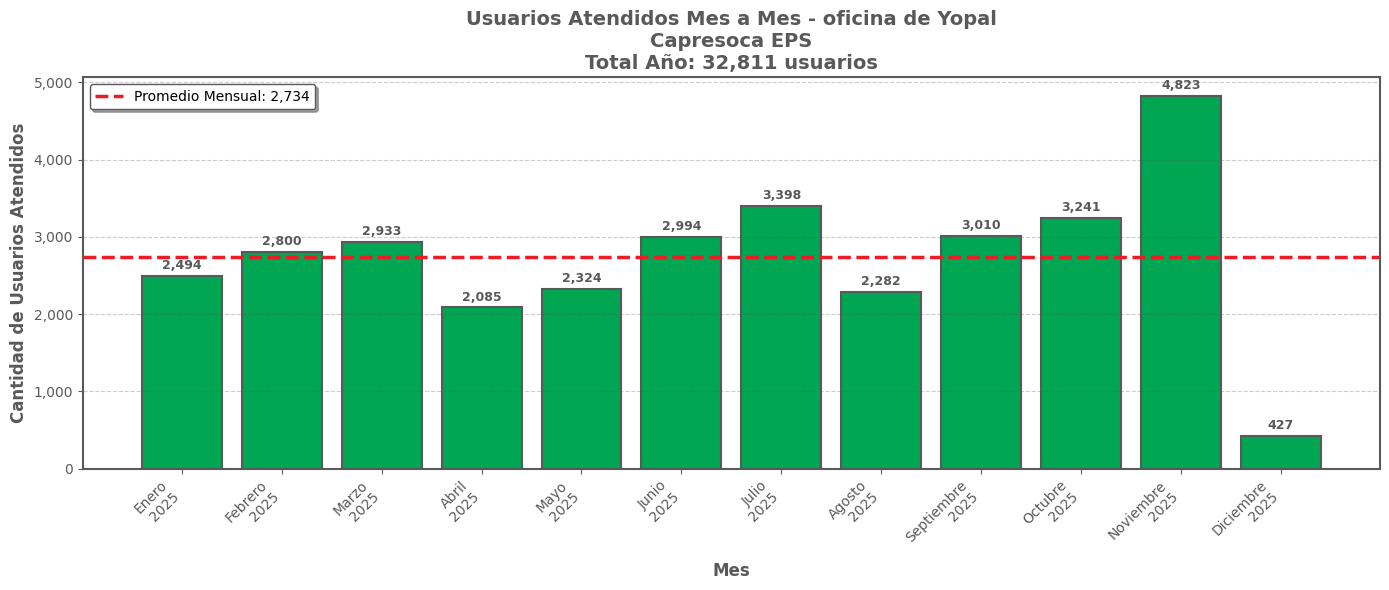


ESTADÍSTICAS DE ATENCIÓN - VENTANILLA YOPAL
Total anual atendidos: 32,811 usuarios
Promedio mensual: 2,734 usuarios
Mes con mayor atención: Noviembre 2025 (4,823 usuarios)
Mes con menor atención: Diciembre 2025 (427 usuarios)



In [12]:
# Extraer el mes y año de 'Fecha Cierre' para agrupar
df_yopal['Mes'] = df_yopal['Fecha Cierre'].dt.to_period('M')

# Contar cantidad de usuarios atendidos por mes
usuarios_por_mes = df_yopal.groupby('Mes').size()

# Calcular el promedio mensual
promedio_mensual = usuarios_por_mes.mean()

# Calcular total acumulado del año
total_anual = usuarios_por_mes.sum()

# Crear etiquetas de meses en español
meses_espanol = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Convertir los periodos a etiquetas legibles
etiquetas = [f"{meses_espanol[periodo.month]}\n{periodo.year}" for periodo in usuarios_por_mes.index]

# Colores institucionales Capresoca
color_verde = '#00A651'  # Verde institucional
color_rojo = '#ED1C24'   # Rojo institucional
color_gris = '#58595B'   # Gris/negro institucional

# Crear la gráfica
fig, ax = plt.subplots(figsize=(14, 6))
barras = ax.bar(range(len(usuarios_por_mes)), usuarios_por_mes.values, 
                color=color_verde, edgecolor=color_gris, linewidth=1.5)

# Agregar valores sobre las barras
for i, (barra, valor) in enumerate(zip(barras, usuarios_por_mes.values)):
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 50,
            f'{int(valor):,}', ha='center', va='bottom', fontsize=9, 
            fontweight='bold', color=color_gris)

# Agregar línea del promedio
ax.axhline(y=promedio_mensual, color=color_rojo, linestyle='--', linewidth=2.5, 
           label=f'Promedio Mensual: {int(promedio_mensual):,}')

# Personalizar la gráfica
ax.set_title(f'Usuarios Atendidos Mes a Mes - oficina de Yopal\nCapresoca EPS\nTotal Año: {int(total_anual):,} usuarios', 
             fontsize=14, fontweight='bold', color=color_gris)
ax.set_xlabel('Mes', fontsize=12, color=color_gris, fontweight='bold')
ax.set_ylabel('Cantidad de Usuarios Atendidos', fontsize=12, color=color_gris, fontweight='bold')
ax.set_xticks(range(len(usuarios_por_mes)))
ax.set_xticklabels(etiquetas, rotation=45, ha='right', color=color_gris)

# Formatear eje Y con números enteros
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
ax.tick_params(axis='y', colors=color_gris)
ax.tick_params(axis='x', colors=color_gris)

# Personalizar bordes del gráfico
for spine in ax.spines.values():
    spine.set_edgecolor(color_gris)
    spine.set_linewidth(1.5)

ax.legend(loc='upper left', fontsize=10, frameon=True, facecolor='white', 
          edgecolor=color_gris, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--', color=color_gris)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Mostrar estadísticas
print(f"\n{'='*60}")
print(f"ESTADÍSTICAS DE ATENCIÓN - VENTANILLA YOPAL")
print(f"{'='*60}")
print(f"Total anual atendidos: {int(total_anual):,} usuarios")
print(f"Promedio mensual: {int(promedio_mensual):,} usuarios")
print(f"Mes con mayor atención: {meses_espanol[usuarios_por_mes.idxmax().month]} {usuarios_por_mes.idxmax().year} ({int(usuarios_por_mes.max()):,} usuarios)")
print(f"Mes con menor atención: {meses_espanol[usuarios_por_mes.idxmin().month]} {usuarios_por_mes.idxmin().year} ({int(usuarios_por_mes.min()):,} usuarios)")
print(f"{'='*60}\n")

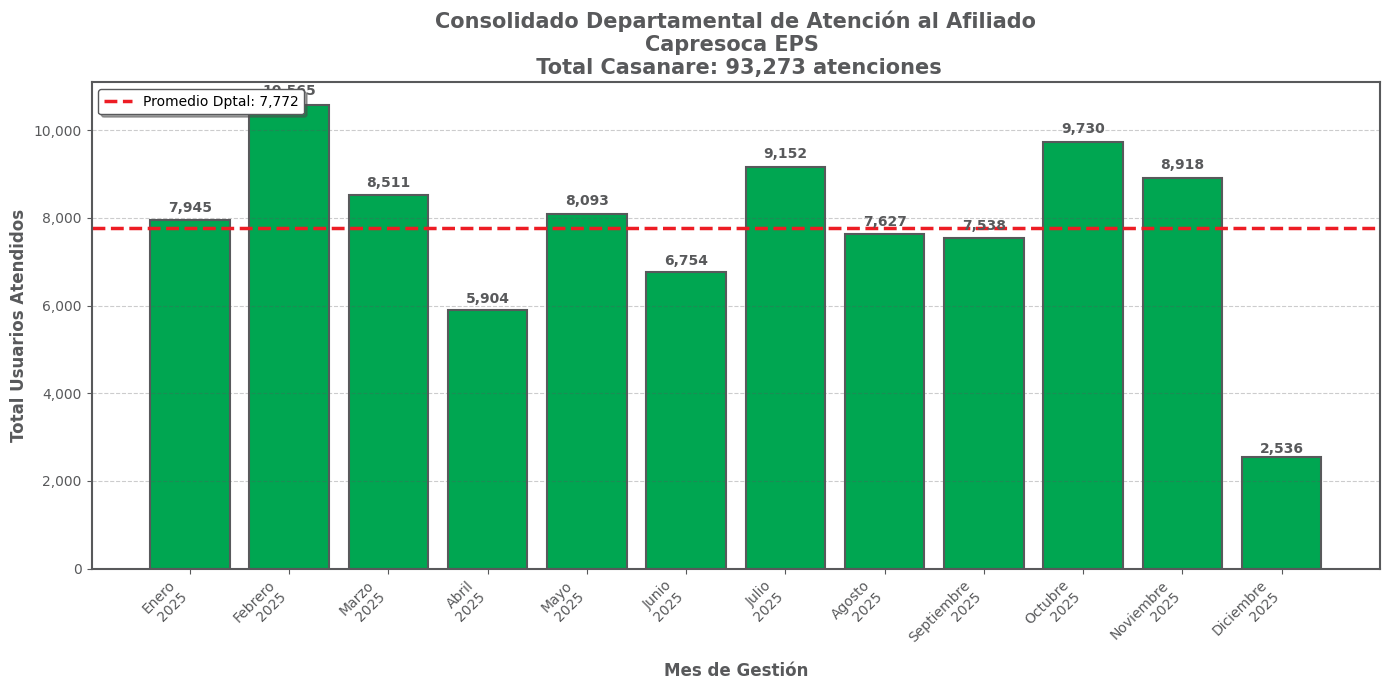


ESTADÍSTICAS CONSOLIDADAS - DEPARTAMENTO DE CASANARE
Total anual (Yopal + Municipios): 93,273 usuarios
Promedio mensual departamental:   7,772 usuarios
Pico máximo de atención:          Febrero 2025 (10,565 usuarios)
Valle mínimo de atención:         Diciembre 2025 (2,536 usuarios)



In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================================================================
# 1. UNIFICACIÓN Y PROCESAMIENTO DE DATOS
# ==============================================================================

# Aseguramos que ambas columnas de fecha sean tipo datetime (Buenas prácticas)
# Usamos .copy() para no afectar los DataFrames originales si los necesitas después
fechas_yopal = pd.to_datetime(df_yopal['Fecha Cierre']).copy()
fechas_municipios = pd.to_datetime(df_municipios['Fecha Cierre']).copy()

# CONCATENACIÓN: Unimos ambas series de tiempo en una sola
# Esto crea un "super listado" de todas las fechas de atención en Casanare
todas_las_fechas = pd.concat([fechas_yopal, fechas_municipios])

# Convertimos a Periodo Mensual y contamos
# sort_index() es CRUCIAL para asegurar que los meses aparezcan en orden cronológico
usuarios_por_mes = todas_las_fechas.dt.to_period('M').value_counts().sort_index()

# Cálculos estadísticos globales
promedio_mensual = usuarios_por_mes.mean()
total_anual = usuarios_por_mes.sum()

# ==============================================================================
# 2. PREPARACIÓN DE ETIQUETAS
# ==============================================================================

meses_espanol = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Generamos etiquetas legibles
etiquetas = [f"{meses_espanol[periodo.month]}\n{periodo.year}" for periodo in usuarios_por_mes.index]

# ==============================================================================
# 3. CONFIGURACIÓN VISUAL (ESTILO CAPRESOCA)
# ==============================================================================
color_verde = '#00A651'
color_rojo = '#ED1C24'
color_gris = '#58595B'

fig, ax = plt.subplots(figsize=(14, 7))

# Generar barras
barras = ax.bar(range(len(usuarios_por_mes)), usuarios_por_mes.values, 
                color=color_verde, edgecolor=color_gris, linewidth=1.5)

# Agregar valores sobre las barras (Data Labels)
# Ajustamos el offset dinámicamente para que se vea bien sin importar la escala
for barra, valor in zip(barras, usuarios_por_mes.values):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, height + (height * 0.015),
            f'{int(valor):,}', ha='center', va='bottom', fontsize=10, 
            fontweight='bold', color=color_gris)

# Línea del promedio
ax.axhline(y=promedio_mensual, color=color_rojo, linestyle='--', linewidth=2.5, 
           label=f'Promedio Dptal: {int(promedio_mensual):,}')

# ==============================================================================
# 4. PERSONALIZACIÓN FINAL
# ==============================================================================

# Título Holístico
ax.set_title(f'Consolidado Departamental de Atención al Afiliado\nCapresoca EPS \n Total Casanare: {int(total_anual):,} atenciones', 
             fontsize=15, fontweight='bold', color=color_gris)

ax.set_xlabel('Mes de Gestión', fontsize=12, color=color_gris, fontweight='bold')
ax.set_ylabel('Total Usuarios Atendidos', fontsize=12, color=color_gris, fontweight='bold')

# Configuración Eje X
ax.set_xticks(range(len(usuarios_por_mes)))
ax.set_xticklabels(etiquetas, rotation=45, ha='right', color=color_gris)

# Formato de miles en Eje Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
ax.tick_params(axis='both', colors=color_gris)

# Bordes
for spine in ax.spines.values():
    spine.set_edgecolor(color_gris)
    spine.set_linewidth(1.5)

# Leyenda y Grid
ax.legend(loc='upper left', fontsize=10, frameon=True, facecolor='white', 
          edgecolor=color_gris, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--', color=color_gris)

plt.tight_layout()
plt.show()

# ==============================================================================
# 5. REPORTE DE ESTADÍSTICAS CONSOLIDADO
# ==============================================================================
print(f"\n{'='*60}")
print(f"ESTADÍSTICAS CONSOLIDADAS - DEPARTAMENTO DE CASANARE")
print(f"{'='*60}")
print(f"Total anual (Yopal + Municipios): {int(total_anual):,} usuarios")
print(f"Promedio mensual departamental:   {int(promedio_mensual):,} usuarios")

mes_max = usuarios_por_mes.idxmax()
print(f"Pico máximo de atención:          {meses_espanol[mes_max.month]} {mes_max.year} ({int(usuarios_por_mes.max()):,} usuarios)")

mes_min = usuarios_por_mes.idxmin()
print(f"Valle mínimo de atención:         {meses_espanol[mes_min.month]} {mes_min.year} ({int(usuarios_por_mes.min()):,} usuarios)")
print(f"{'='*60}\n")

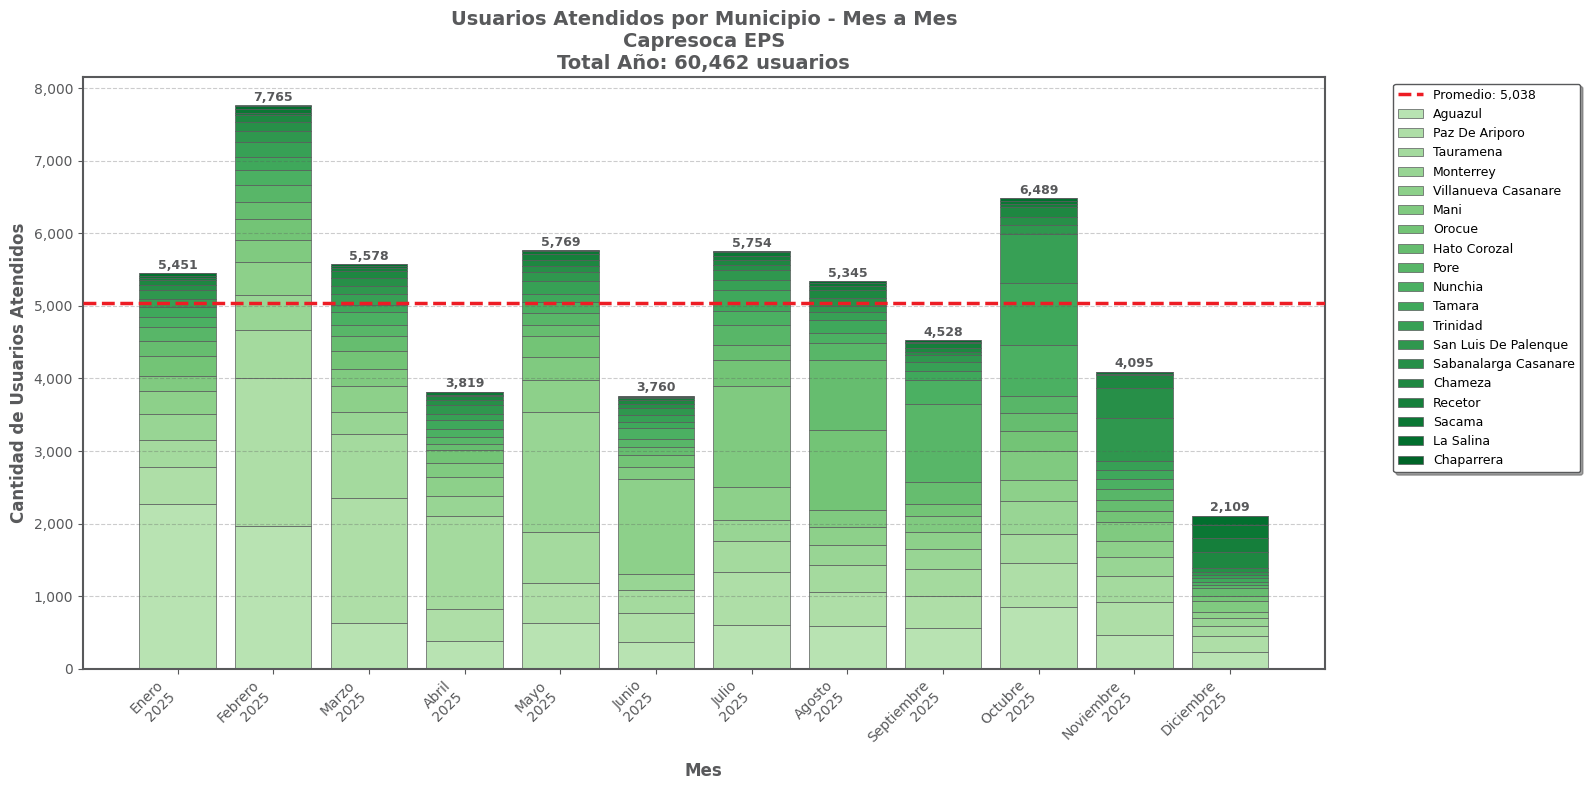


ESTADÍSTICAS DE ATENCIÓN - MUNICIPIOS
Total anual atendidos: 60,462 usuarios
Promedio mensual: 5,038 usuarios

TOP 5 MUNICIPIOS CON MÁS ATENCIONES:
1. Aguazul: 9,522 usuarios (15.7%)
2. Paz De Ariporo: 8,602 usuarios (14.2%)
3. Tauramena: 6,281 usuarios (10.4%)
4. Monterrey: 4,969 usuarios (8.2%)
5. Villanueva Casanare: 4,658 usuarios (7.7%)



In [13]:
import numpy as np
# Extraer el mes y año de 'Fecha Cierre' para agrupar
df_municipios['Mes'] = df_municipios['Fecha Cierre'].dt.to_period('M')

# Agrupar por Mes y Municipio
usuarios_municipios = df_municipios.groupby(['Mes', 'Municipio']).size().unstack(fill_value=0)

# Calcular totales por municipio
totales_municipio = usuarios_municipios.sum().sort_values(ascending=False)

# Crear etiquetas de meses en español
meses_espanol = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

etiquetas = [f"{meses_espanol[periodo.month]}\n{periodo.year}" for periodo in usuarios_municipios.index]

# Colores institucionales Capresoca
color_verde = '#00A651'
color_rojo = '#ED1C24'
color_gris = '#58595B'

# Paleta de colores para los municipios (variaciones de verde)
colores_municipios = plt.cm.Greens(np.linspace(0.3, 0.9, len(totales_municipio)))

# Crear la gráfica apilada
fig, ax = plt.subplots(figsize=(16, 8))

# Graficar barras apiladas (ordenadas por total)
bottom = np.zeros(len(usuarios_municipios))
for i, municipio in enumerate(totales_municipio.index):
    valores = usuarios_municipios[municipio].values
    barras = ax.bar(range(len(usuarios_municipios)), valores, bottom=bottom,
                    label=municipio, color=colores_municipios[i], 
                    edgecolor=color_gris, linewidth=0.5)
    bottom += valores

# Agregar totales mensuales sobre las barras
totales_mensuales = usuarios_municipios.sum(axis=1)
for i, total in enumerate(totales_mensuales):
    ax.text(i, total + 20, f'{int(total):,}', ha='center', va='bottom',
            fontsize=9, fontweight='bold', color=color_gris)

# Línea de promedio
promedio_mensual = totales_mensuales.mean()
ax.axhline(y=promedio_mensual, color=color_rojo, linestyle='--', linewidth=2.5,
           label=f'Promedio: {int(promedio_mensual):,}', zorder=100)

# Personalizar la gráfica
total_anual = totales_mensuales.sum()
ax.set_title(f'Usuarios Atendidos por Municipio - Mes a Mes\nCapresoca EPS\nTotal Año: {int(total_anual):,} usuarios', 
             fontsize=14, fontweight='bold', color=color_gris)
ax.set_xlabel('Mes', fontsize=12, color=color_gris, fontweight='bold')
ax.set_ylabel('Cantidad de Usuarios Atendidos', fontsize=12, color=color_gris, fontweight='bold')
ax.set_xticks(range(len(usuarios_municipios)))
ax.set_xticklabels(etiquetas, rotation=45, ha='right', color=color_gris)

# Formatear eje Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
ax.tick_params(axis='y', colors=color_gris)
ax.tick_params(axis='x', colors=color_gris)

# Personalizar bordes
for spine in ax.spines.values():
    spine.set_edgecolor(color_gris)
    spine.set_linewidth(1.5)

# Leyenda fuera del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9,
          frameon=True, facecolor='white', edgecolor=color_gris, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--', color=color_gris)
plt.tight_layout()
plt.show()

# Mostrar estadísticas
print(f"\n{'='*70}")
print(f"ESTADÍSTICAS DE ATENCIÓN - MUNICIPIOS")
print(f"{'='*70}")
print(f"Total anual atendidos: {int(total_anual):,} usuarios")
print(f"Promedio mensual: {int(promedio_mensual):,} usuarios")
print(f"\nTOP 5 MUNICIPIOS CON MÁS ATENCIONES:")
for i, (municipio, total) in enumerate(totales_municipio.head(5).items(), 1):
    porcentaje = (total / total_anual) * 100
    print(f"{i}. {municipio}: {int(total):,} usuarios ({porcentaje:.1f}%)")
print(f"{'='*70}\n")

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_32584\1380798371.py:68: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1,


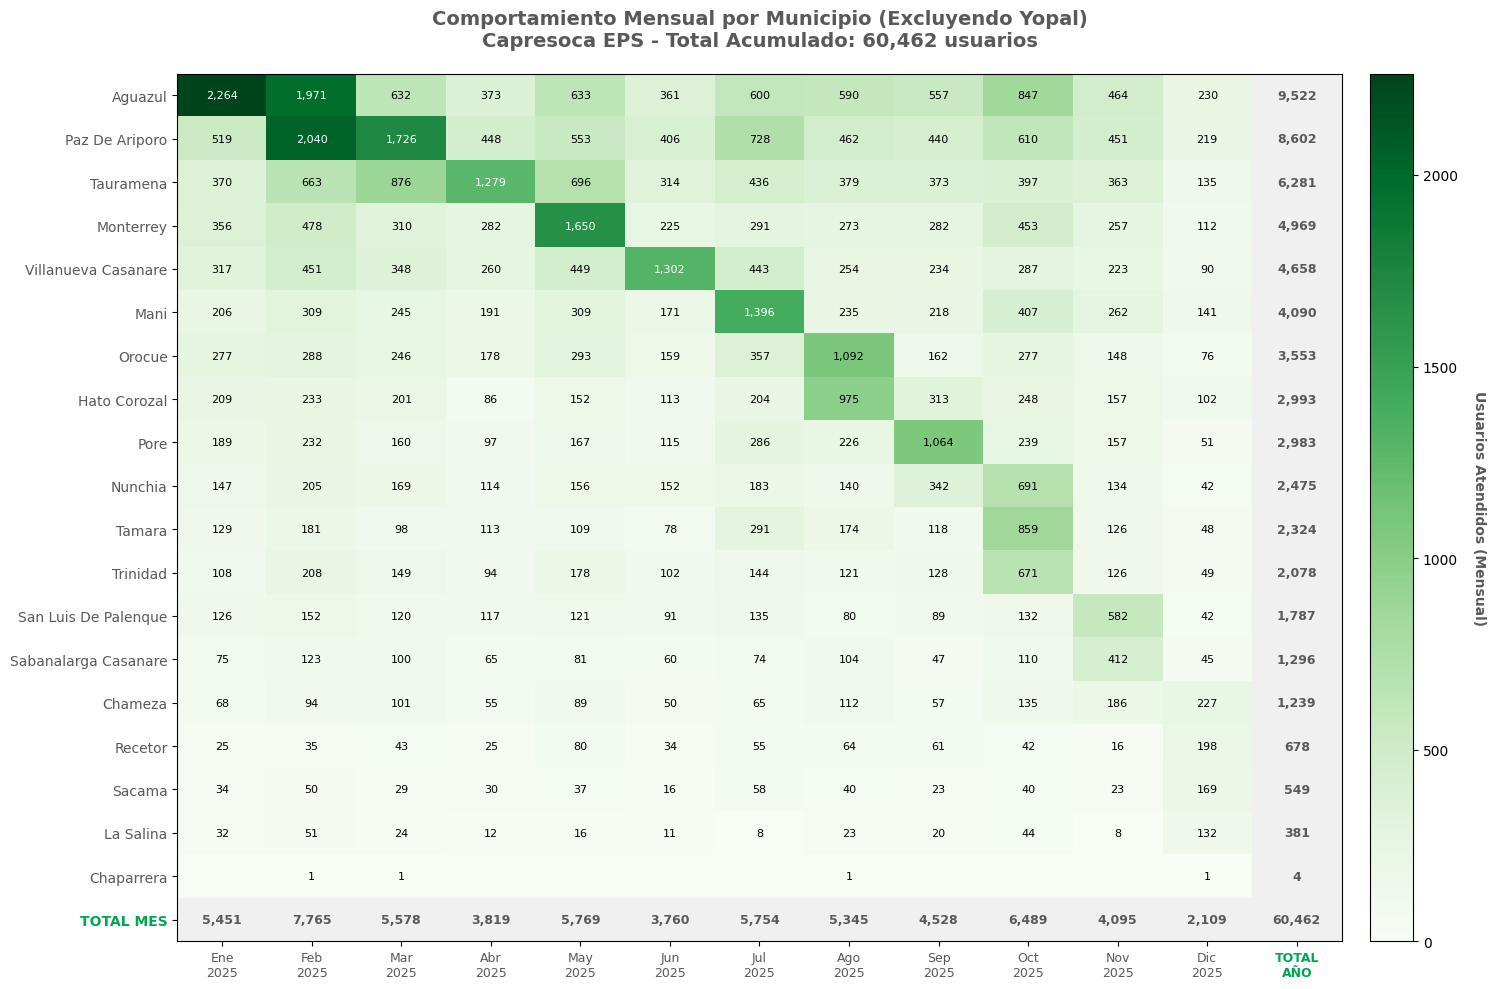

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ==============================================================================
# 1. PREPARACIÓN DE LA MATRIZ DE DATOS
# ==============================================================================

# Asumimos que df_municipios ya tiene la columna 'Mes' (tipo Period o similar)
# y que Yopal ya está excluido.

# Crear la matriz: Filas = Municipios, Columnas = Meses
matriz_calor = df_municipios.groupby(['Municipio', 'Mes']).size().unstack(fill_value=0)

# Ordenar filas: Municipios con mayor atención total arriba (Principio de Pareto)
orden_municipios = matriz_calor.sum(axis=1).sort_values(ascending=False).index
matriz_calor = matriz_calor.loc[orden_municipios]

# --- AGREGAR TOTALES ---
# 1. Columna Total (Suma horizontal: Total por Municipio en el año)
matriz_calor['TOTAL'] = matriz_calor.sum(axis=1)

# 2. Fila Total (Suma vertical: Total por Mes de todos los municipios)
matriz_calor.loc['TOTAL MES'] = matriz_calor.sum(axis=0)

# ==============================================================================
# 2. CONFIGURACIÓN VISUAL
# ==============================================================================
color_verde = '#00A651'
color_gris = '#58595B'
color_fondo_total = '#f0f0f0' # Gris muy suave para diferenciar los totales

# Generar etiquetas dinámicas para el eje X
# Diccionario auxiliar para nombres cortos
nombres_meses = {1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 
                 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'}

etiquetas_x = []
for col in matriz_calor.columns:
    if col == 'TOTAL':
        etiquetas_x.append('TOTAL\nAÑO')
    else:
        # Extraemos mes y año del objeto Period
        etiquetas_x.append(f"{nombres_meses[col.month]}\n{col.year}")

fig, ax = plt.subplots(figsize=(16, 10))

# ==============================================================================
# 3. GENERACIÓN DEL HEATMAP (CON LÓGICA DE CAPAS)
# ==============================================================================

# Paso A: Definir el rango de color basado SOLO en los datos mensuales (sin totales)
# Esto evita que los totales "laven" el color del resto del mapa
datos_internos = matriz_calor.iloc[:-1, :-1]
max_val = datos_internos.values.max()

# Paso B: Dibujar Heatmap
im = ax.imshow(matriz_calor.values, cmap='Greens', aspect='auto', 
               vmin=0, vmax=max_val)

# Paso C: Dibujar "parches" grises sobre las celdas de Totales
filas, cols = matriz_calor.shape
for i in range(filas):
    for j in range(cols):
        # Si es la última fila (Total Mes) o última columna (Total Año)
        if i == filas-1 or j == cols-1:
            rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, 
                                     fill=True, color=color_fondo_total, 
                                     edgecolor='white', linewidth=1)
            ax.add_patch(rect)

# ==============================================================================
# 4. ANOTACIONES Y ETIQUETAS
# ==============================================================================

# Configurar Ejes
ax.set_xticks(range(len(matriz_calor.columns)))
ax.set_xticklabels(etiquetas_x, rotation=0, ha='center', fontsize=9, color=color_gris)
ax.set_yticks(range(len(matriz_calor.index)))
ax.set_yticklabels(matriz_calor.index, color=color_gris, fontsize=10)

# Loop para poner los valores numéricos
for i in range(filas):
    for j in range(cols):
        valor = int(matriz_calor.values[i, j])
        
        # Determinar si estamos en una celda de total
        es_total = (i == filas-1) or (j == cols-1)
        
        if valor > 0:
            if es_total:
                # Estilo para Totales: Gris oscuro y Negrita
                color_txt = color_gris
                weight = 'bold'
                size = 9 
            else:
                # Estilo para Datos: Contraste dinámico sobre fondo verde
                color_txt = "white" if valor > max_val/2 else "black"
                weight = 'normal'
                size = 8
            
            ax.text(j, i, f"{valor:,}", ha="center", va="center",
                    color=color_txt, fontsize=size, fontweight=weight)

# Barra de color
cbar = plt.colorbar(im, ax=ax, pad=0.02)
cbar.set_label('Usuarios Atendidos (Mensual)', rotation=270, labelpad=20, 
               color=color_gris, fontweight='bold')

# Título Dinámico
total_global = matriz_calor.loc['TOTAL MES', 'TOTAL']
ax.set_title(f'Comportamiento Mensual por Municipio (Excluyendo Yopal)\nCapresoca EPS - Total Acumulado: {int(total_global):,} usuarios',
             fontsize=14, fontweight='bold', color=color_gris, pad=20)

# Resaltar visualmente las etiquetas de los totales en los ejes
ax.get_xticklabels()[-1].set_weight('bold')
ax.get_xticklabels()[-1].set_color(color_verde)
ax.get_yticklabels()[-1].set_weight('bold')
ax.get_yticklabels()[-1].set_color(color_verde)

plt.tight_layout()
plt.show()

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_32584\289885241.py:57: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1,


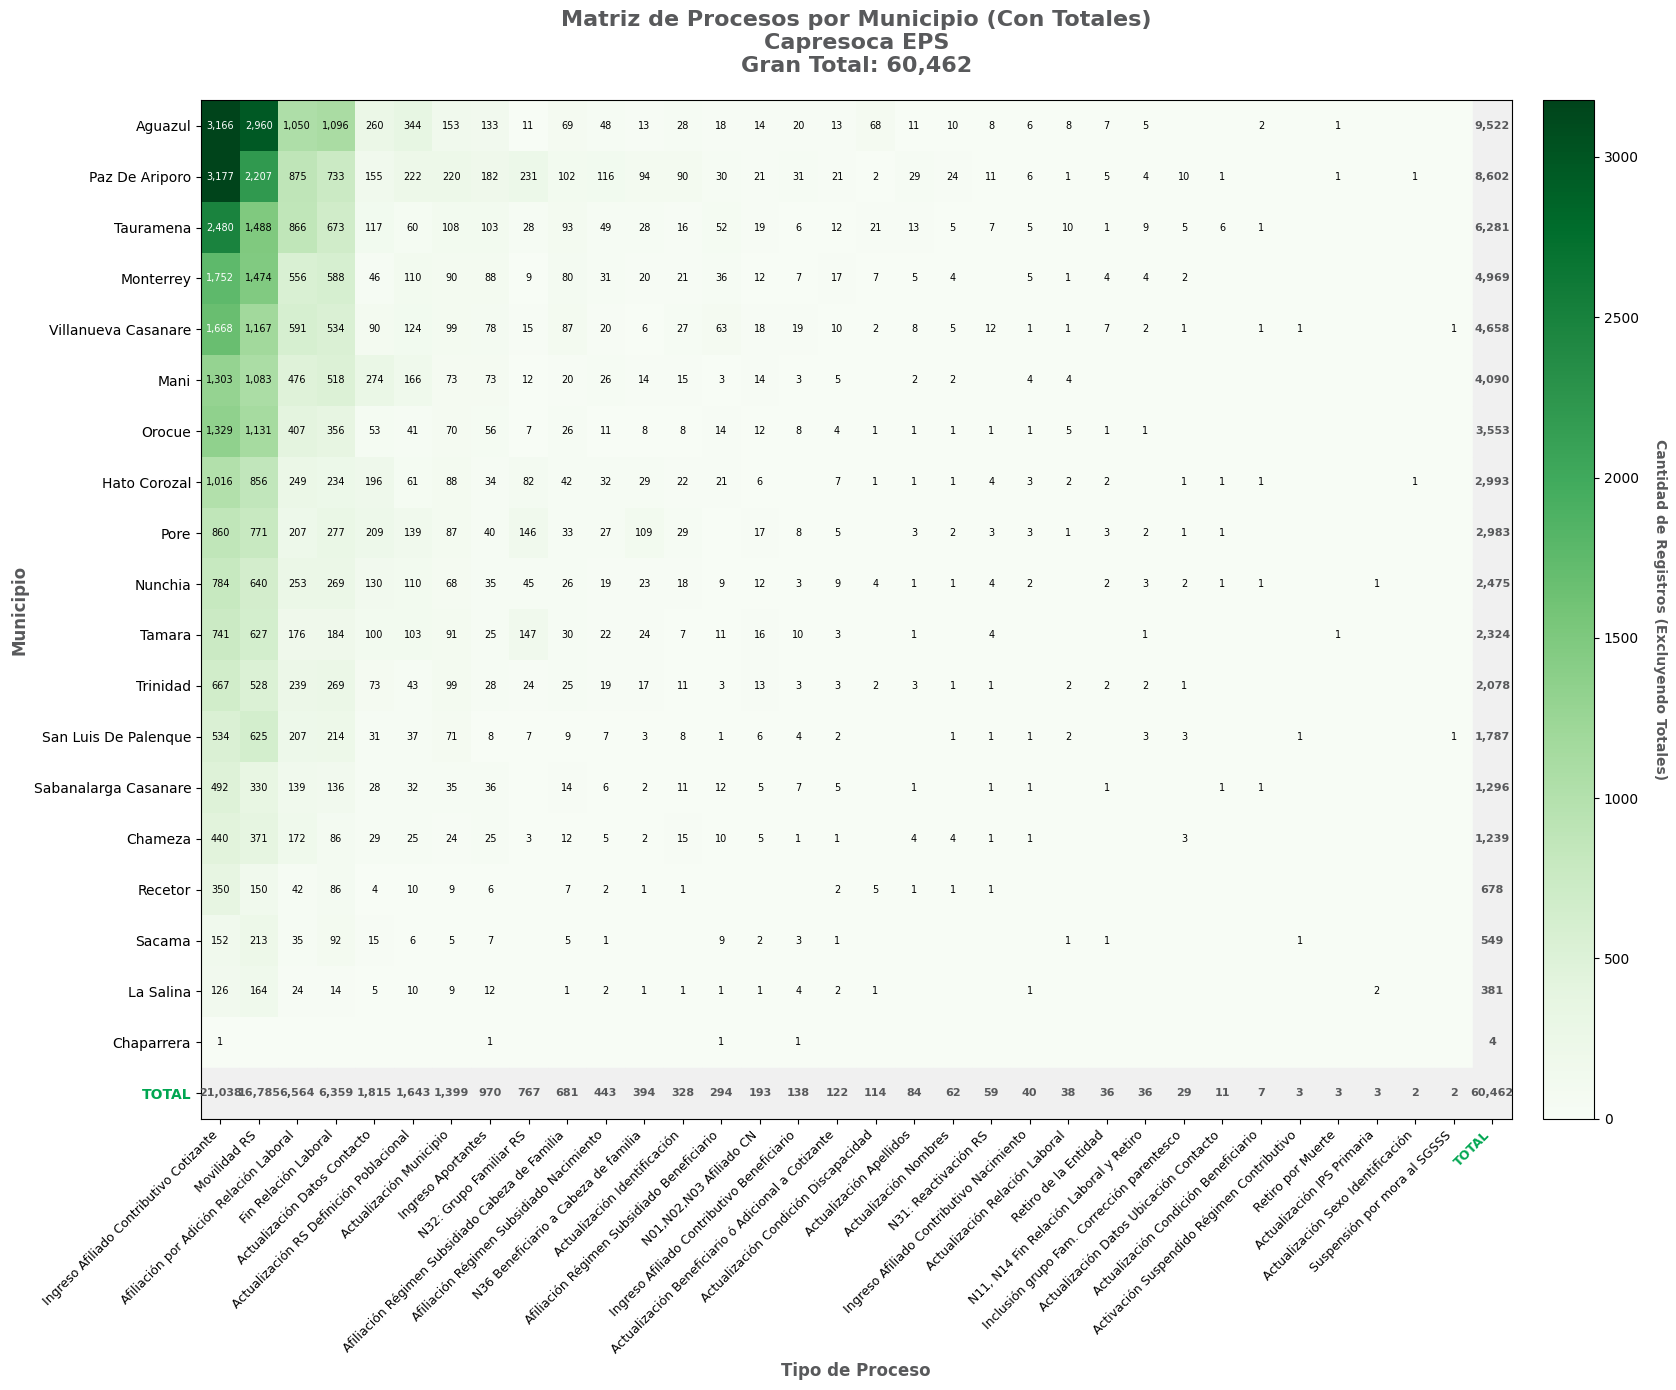

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ==============================================================================
# 1. PREPARACIÓN DE DATOS
# ==============================================================================

# Agrupar por Municipio y Proceso
procesos_municipios = df_municipios.groupby(['Municipio', 'Proceso']).size().unstack(fill_value=0)

# Ordenar por magnitud (Pareto) antes de calcular totales finales
# Esto asegura que los municipios/procesos más grandes queden arriba/izquierda
totales_por_municipio = procesos_municipios.sum(axis=1).sort_values(ascending=False)
procesos_municipios = procesos_municipios.loc[totales_por_municipio.index]

totales_por_proceso = procesos_municipios.sum(axis=0).sort_values(ascending=False)
procesos_municipios = procesos_municipios[totales_por_proceso.index]

# --- AQUÍ LA MAGIA: Agregamos la fila y columna de "TOTAL" al DataFrame ---
# 1. Agregamos columna Total
procesos_municipios['TOTAL'] = procesos_municipios.sum(axis=1)
# 2. Agregamos fila Total
procesos_municipios.loc['TOTAL'] = procesos_municipios.sum(axis=0)

# ==============================================================================
# 2. CONFIGURACIÓN VISUAL
# ==============================================================================
color_verde = '#00A651'
color_gris = '#58595B'
color_fondo_total = '#f0f0f0' # Un gris muy suave para diferenciar los totales

fig, ax = plt.subplots(figsize=(18, 14)) # Un poco más ancho para la columna Total

# ==============================================================================
# 3. GENERACIÓN DEL HEATMAP (LÓGICA AVANZADA)
# ==============================================================================

# Paso A: Separamos los datos "internos" de los "totales" para la escala de color
datos_internos = procesos_municipios.iloc[:-1, :-1] # Todo menos la última fila y col
max_val = datos_internos.values.max() # El valor máximo real (sin contar totales)

# Paso B: Dibujamos el mapa de calor SOLO con la escala de los datos internos
# Usamos vmin y vmax para "anclar" los colores a los datos reales, no a los totales
im = ax.imshow(procesos_municipios.values, cmap='Greens', aspect='auto', 
               vmin=0, vmax=max_val)

# Paso C: "Pintamos" las celdas de Totales de otro color para diferenciarlas
# Creamos máscaras para la última fila y última columna
filas, cols = procesos_municipios.shape
for i in range(filas):
    for j in range(cols):
        # Si es la última fila O la última columna (Zona de Totales)
        if i == filas-1 or j == cols-1:
            # Dibujamos un rectángulo gris encima para "tapar" el verde
            rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, 
                               fill=True, color=color_fondo_total, 
                               edgecolor='white', linewidth=1)
            ax.add_patch(rect)

# ==============================================================================
# 4. ANOTACIONES Y ETIQUETAS
# ==============================================================================

# Configurar ejes
ax.set_xticks(range(len(procesos_municipios.columns)))
ax.set_xticklabels(procesos_municipios.columns, rotation=45, ha='right', fontsize=9)
ax.set_yticks(range(len(procesos_municipios.index)))
ax.set_yticklabels(procesos_municipios.index, fontsize=10)

# Loop para poner los textos (números)
for i in range(len(procesos_municipios.index)):
    for j in range(len(procesos_municipios.columns)):
        valor = int(procesos_municipios.values[i, j])
        
        # Lógica de estilo condicional
        es_total = (i == len(procesos_municipios.index)-1) or (j == len(procesos_municipios.columns)-1)
        
        if valor > 0:
            # Si es una celda de TOTAL
            if es_total:
                weight = 'bold'
                size = 8
                # Color oscuro siempre porque el fondo es gris claro
                color_txt = color_gris 
            
            # Si es una celda de DATOS
            else:
                weight = 'normal'
                size = 7
                # Contraste dinámico: Blanco si es verde oscuro, Negro si es verde claro
                color_txt = "white" if valor > max_val/2 else "black"

            text = ax.text(j, i, f"{valor:,}", 
                         ha="center", va="center", 
                         color=color_txt, fontsize=size, fontweight=weight)

# ==============================================================================
# 5. DETALLES FINALES
# ==============================================================================

# Barra de color (Colorbar)
cbar = plt.colorbar(im, ax=ax, pad=0.02)
cbar.set_label('Cantidad de Registros (Excluyendo Totales)', rotation=270, labelpad=20, 
               color=color_gris, fontweight='bold')

# Título
total_general = procesos_municipios.loc['TOTAL', 'TOTAL']
ax.set_title(f'Matriz de Procesos por Municipio (Con Totales)\nCapresoca EPS\nGran Total: {int(total_general):,}',
             fontsize=16, fontweight='bold', color=color_gris, pad=20)

ax.set_xlabel('Tipo de Proceso', fontsize=12, color=color_gris, fontweight='bold')
ax.set_ylabel('Municipio', fontsize=12, color=color_gris, fontweight='bold')

# Colorear etiquetas de ejes para resaltar "TOTAL"
ax.get_xticklabels()[-1].set_weight('bold')
ax.get_xticklabels()[-1].set_color(color_verde)
ax.get_yticklabels()[-1].set_weight('bold')
ax.get_yticklabels()[-1].set_color(color_verde)

plt.tight_layout()
plt.show()

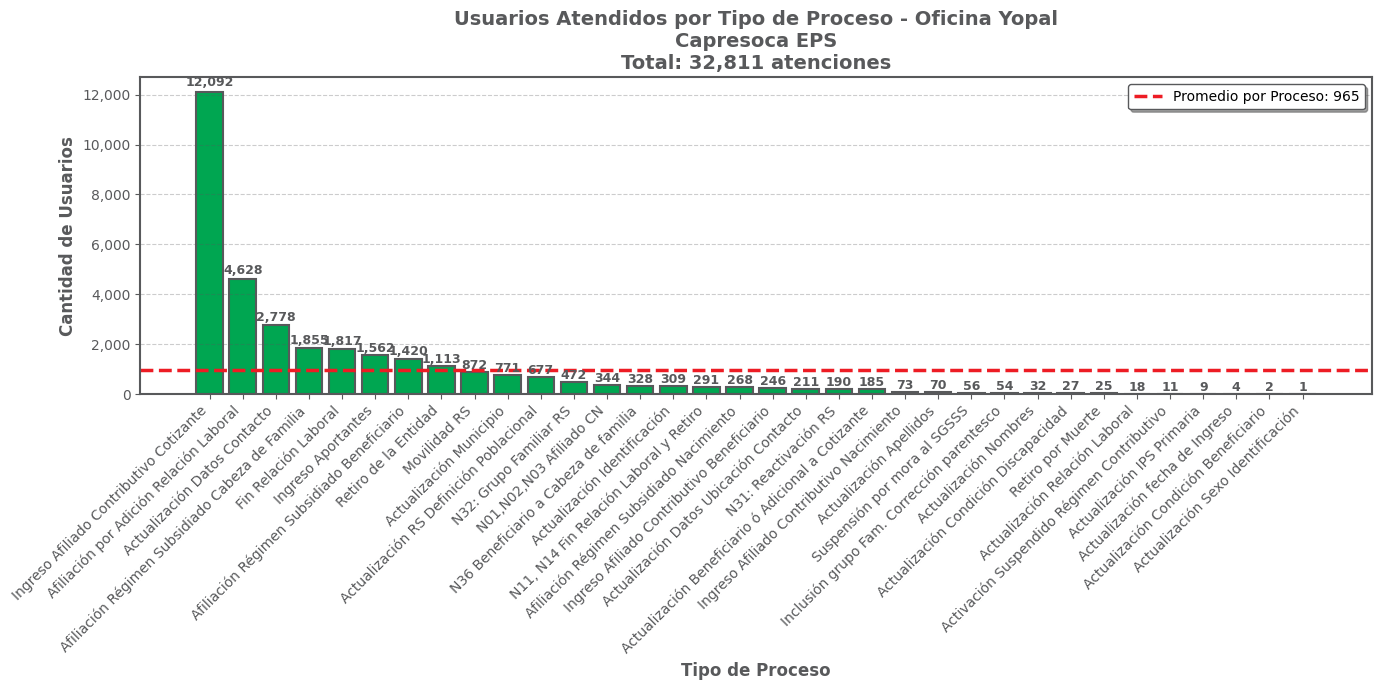


ESTADÍSTICAS POR PROCESO - VENTANILLA YOPAL
Total atenciones: 32,811
Promedio por proceso: 965
Proceso más solicitado: Ingreso Afiliado Contributivo Cotizante (12,092 usuarios)
Proceso menos solicitado: Actualización Sexo Identificación (1 usuarios)
Variedad de procesos: 34 tipos diferentes



In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# ==============================================================================
# 1. PREPARACIÓN Y PROCESAMIENTO DE DATOS
# ==============================================================================

# Validamos que la columna exista para evitar errores en tiempo de ejecución
if 'Proceso' not in df_yopal.columns:
    raise ValueError("La columna 'Proceso' no existe en el DataFrame df_yopal")

# Agrupamos por 'Proceso' y contamos.
# BEST PRACTICE: Usamos value_counts() porque automáticamente ordena de mayor a menor.
# Esto facilita la lectura del gráfico (evita el "espagueti" visual).
usuarios_por_proceso = df_yopal['Proceso'].value_counts()

# Si hay demasiados procesos (ej. > 15), el gráfico se volverá ilegible.
# Opcional: Podrías descomentar la siguiente línea para mostrar solo el Top 10
# usuarios_por_proceso = usuarios_por_proceso.head(10)

# Cálculos estadísticos básicos
promedio_proceso = usuarios_por_proceso.mean()
total_general = usuarios_por_proceso.sum()

# ==============================================================================
# 2. CONFIGURACIÓN VISUAL (ESTILO INSTITUCIONAL)
# ==============================================================================

# Paleta de colores Capresoca (Hardcoded para consistencia de marca)
COLOR_VERDE = '#00A651'
COLOR_ROJO = '#ED1C24'
COLOR_GRIS = '#58595B'

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 7)) # Aumenté un poco el alto para las etiquetas

# Generar las barras
# Usamos range(len(...)) para el eje X y luego mapeamos las etiquetas
barras = ax.bar(range(len(usuarios_por_proceso)), usuarios_por_proceso.values,
                color=COLOR_VERDE, edgecolor=COLOR_GRIS, linewidth=1.5)

# ==============================================================================
# 3. ANOTACIONES Y ETIQUETAS
# ==============================================================================

# Agregar valores sobre las barras (Data Labels)
for barra, valor in zip(barras, usuarios_por_proceso.values):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, height + (height * 0.01), # Offset dinámico del 1%
            f'{int(valor):,}',
            ha='center', va='bottom', fontsize=9,
            fontweight='bold', color=COLOR_GRIS)

# Línea de promedio (Benchmark)
ax.axhline(y=promedio_proceso, color=COLOR_ROJO, linestyle='--', linewidth=2.5,
           label=f'Promedio por Proceso: {int(promedio_proceso):,}')

# Títulos y Ejes
ax.set_title(f'Usuarios Atendidos por Tipo de Proceso - Oficina Yopal\nCapresoca EPS\nTotal: {int(total_general):,} atenciones',
             fontsize=14, fontweight='bold', color=COLOR_GRIS)

ax.set_xlabel('Tipo de Proceso', fontsize=12, color=COLOR_GRIS, fontweight='bold')
ax.set_ylabel('Cantidad de Usuarios', fontsize=12, color=COLOR_GRIS, fontweight='bold')

# Configuración del eje X (Categorías)
# Rotamos 45 grados y alineamos a la derecha para mejorar legibilidad de textos largos
ax.set_xticks(range(len(usuarios_por_proceso)))
ax.set_xticklabels(usuarios_por_proceso.index, rotation=45, ha='right', color=COLOR_GRIS)

# Formatear eje Y con separadores de miles
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Estilizar los "spines" (bordes del gráfico)
for spine in ax.spines.values():
    spine.set_edgecolor(COLOR_GRIS)
    spine.set_linewidth(1.5)

# Colores de los ticks
ax.tick_params(axis='x', colors=COLOR_GRIS)
ax.tick_params(axis='y', colors=COLOR_GRIS)

# Leyenda y Grid
ax.legend(loc='upper right', fontsize=10, frameon=True, facecolor='white',
          edgecolor=COLOR_GRIS, shadow=True)
ax.grid(axis='y', alpha=0.3, linestyle='--', color=COLOR_GRIS)

# Ajuste final para que no se corten las etiquetas rotadas
plt.tight_layout()

plt.show()

# ==============================================================================
# 4. REPORTE DE ESTADÍSTICAS EN CONSOLA
# ==============================================================================
print(f"\n{'='*60}")
print(f"ESTADÍSTICAS POR PROCESO - VENTANILLA YOPAL")
print(f"{'='*60}")
print(f"Total atenciones: {int(total_general):,}")
print(f"Promedio por proceso: {int(promedio_proceso):,}")
print(f"Proceso más solicitado: {usuarios_por_proceso.idxmax()} ({int(usuarios_por_proceso.max()):,} usuarios)")
print(f"Proceso menos solicitado: {usuarios_por_proceso.idxmin()} ({int(usuarios_por_proceso.min()):,} usuarios)")
print(f"Variedad de procesos: {len(usuarios_por_proceso)} tipos diferentes")
print(f"{'='*60}\n")

In [14]:
# Contar cantidad de categorías únicas en la columna 'Proceso'
cantidad_procesos = df_municipios['Proceso'].nunique()
print(f"Cantidad de categorías en 'Proceso': {cantidad_procesos}")

Cantidad de categorías en 'Proceso': 33


In [15]:
print(df_yopal['Proceso'].unique())
print(df_municipios['Proceso'].unique())


['Afiliación Régimen Subsidiado Cabeza de Familia'
 'Afiliación Régimen Subsidiado Beneficiario'
 'Actualización Datos Contacto' 'Ingreso Afiliado Contributivo Cotizante'
 'Retiro de la Entidad' 'Fin Relación Laboral' 'N31: Reactivación RS'
 'Movilidad RS' 'N36 Beneficiario a Cabeza de familia'
 'Ingreso Afiliado Contributivo Nacimiento' 'Actualización Municipio'
 'Afiliación por Adición Relación Laboral' 'Ingreso Aportantes'
 'N01,N02,N03 Afiliado CN'
 'Actualización Beneficiario ó Adicional a Cotizante'
 'Actualización RS Definición Poblacional'
 'Afiliación Régimen Subsidiado Nacimiento'
 'Actualización Relación Laboral' 'Actualización Identificación'
 'Ingreso Afiliado Contributivo Beneficiario'
 'Actualización Condición Discapacidad'
 'Activación Suspendido Régimen Contributivo' 'Actualización Nombres'
 'N32: Grupo Familiar RS' 'Actualización Condición Beneficiario'
 'N11, N14 Fin Relación Laboral y Retiro'
 'Inclusión grupo Fam. Corrección parentesco' 'Retiro por Muerte'
 'Actual

In [16]:
print(df_expedientes.columns)

Index(['Proceso', 'Tipo', 'Expediente', 'Tipo Documento',
       'Número Identificación', 'Nombre Afiliado', 'Fecha de Nacimiento',
       'Departamento', 'Municipio', 'Estado Expediente', 'Régimen Expediente',
       'Fecha Grabado', 'Usuario Grabado', 'Fecha Cierre', 'Usuario Cierre',
       'Carta Derechos', 'NS Automática', 'Tipo Ingreso', 'EPS Procedencia',
       'Causal Anulación', 'Motivo Anulación', 'Usuario Anula', 'Fecha Anula',
       'Unnamed: 23'],
      dtype='object')


In [17]:
print(df_yopal['Fecha Cierre'].dtype)
print(df_municipios['Fecha Cierre'].dtype)

datetime64[ns]
datetime64[ns]


In [18]:
import random

# Imprimir un dato random de la columna 'Fecha Cierre' para ver su estructura
sample_index = random.choice(df_municipios[df_municipios['Fecha Cierre'].notna()].index)
print(f"Ejemplo de 'Fecha Cierre': {df_municipios.loc[sample_index, 'Fecha Cierre']}")
print(f"Tipo: {type(df_municipios.loc[sample_index, 'Fecha Cierre'])}")

Ejemplo de 'Fecha Cierre': 2025-08-25 22:59:00
Tipo: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
